In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import HashingVectorizer
import itertools
import numpy as np

In [78]:
df = pd.read_csv("dataset.csv")

In [79]:
len(df)

293239

In [80]:
df = df.dropna()

In [81]:
df = df.sort_values(by=['Label'], ascending=True)

In [82]:
#df = df[0:100000]

In [83]:
#for i, r in df.iterrows():
 #   if len(r['Head'].split(' ')) < 3 or len(r['Body'].split(' ')) < 4:
  #      df = df.drop(index=i, axis=0, inplace=True)

In [84]:
df = df[0:50000]

In [85]:
df.groupby('Label').count()

,Head,Body,Features
Label,,,
0,24903,24903,24903
1,50097,50097,50097


In [86]:
df['con'] = df['Head']+' '+df['Body']

In [87]:
df.head(5)

,Head,Body,Label,Features,con
0,food snack selection popular greek dishes,underwhelmed main courses tables sometimes har...,0,5.0 4.435897435897436 39 4.0 4.009523809523809...,food snack selection popular greek dishes unde...
20343,deal walkin wait nearly min guarantee well wor...,go long broth bit short noodles meat order dis...,0,5.0 5.0 1 4.0 3.965988662887629 2999 6 5,deal walkin wait nearly min guarantee well wor...
20342,best ramen new york city,sat bar twice always interesting watching huge...,0,4.0 4.333333333333333 3 4.0 3.965988662887629 ...,best ramen new york city sat bar twice always ...
20341,obsessed ramen love totto ramen,miso ramen way salty sort heavy noodles great ...,0,5.0 5.0 1 4.0 3.965988662887629 2999 6 5,obsessed ramen love totto ramen miso ramen way...
20340,best ramen world,loooooooooong wait prepare go lunch hour dinner,0,5.0 5.0 1 4.0 3.965988662887629 2999 4 5,best ramen world loooooooooong wait prepare go...


In [88]:
df = df.drop("Features", axis=1)  
df = df.drop("Head", axis=1)
df = df.drop("Body", axis=1)  

In [89]:
y = df.Label 

In [90]:
df = df.drop("Label", axis=1)  

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df['con'], y, test_size=0.33, random_state=200)

In [92]:
count_vectorizer = CountVectorizer(stop_words='english')

In [93]:
count_train = count_vectorizer.fit_transform(X_train)  

In [94]:
count_test = count_vectorizer.transform(X_test)

In [95]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [96]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

In [97]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [98]:
len(df)

75000

In [99]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.689
Confusion matrix, without normalization
[[  547  7662]
 [   41 16500]]


MultinomialNB()

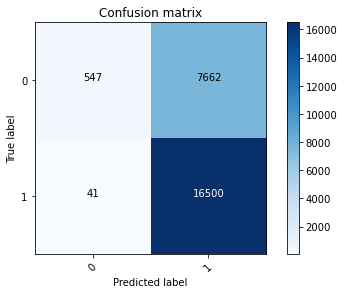

In [100]:
clf = MultinomialNB() 

clf.fit(tfidf_train, y_train)                       # Fit Naive Bayes classifier according to X, y

pred = clf.predict(tfidf_test)                     # Perform classification on an array of test vectors X.
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)


clf = MultinomialNB()

clf.fit(count_train, y_train)

accuracy:   0.750
Confusion matrix, without normalization
[[ 4627  3582]
 [ 2617 13924]]


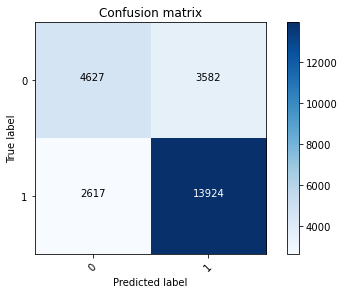

In [101]:
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

In [102]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("f1_score(macro): {}".format(f1_score(y_test, pred, average="macro")))
print("accuracy_score: {}".format(accuracy_score(y_test, pred)))
print("precision_score(macro): {}".format(precision_score(y_test, pred, average="macro")))
print("f1_score: {}".format(f1_score(y_test, pred)))
print("precision_score: {}".format(precision_score(y_test, pred)))

f1_score(macro): 0.708388139120236
accuracy_score: 0.7495353535353535
precision_score(macro): 0.7170599724332111
f1_score: 0.8179281581343437
precision_score: 0.7953844396207015
